In [1]:
#Import libraries for DB analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

Step1: Load the data and understand the data structure
Step2: Check the data types and column details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
Original Data
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089   

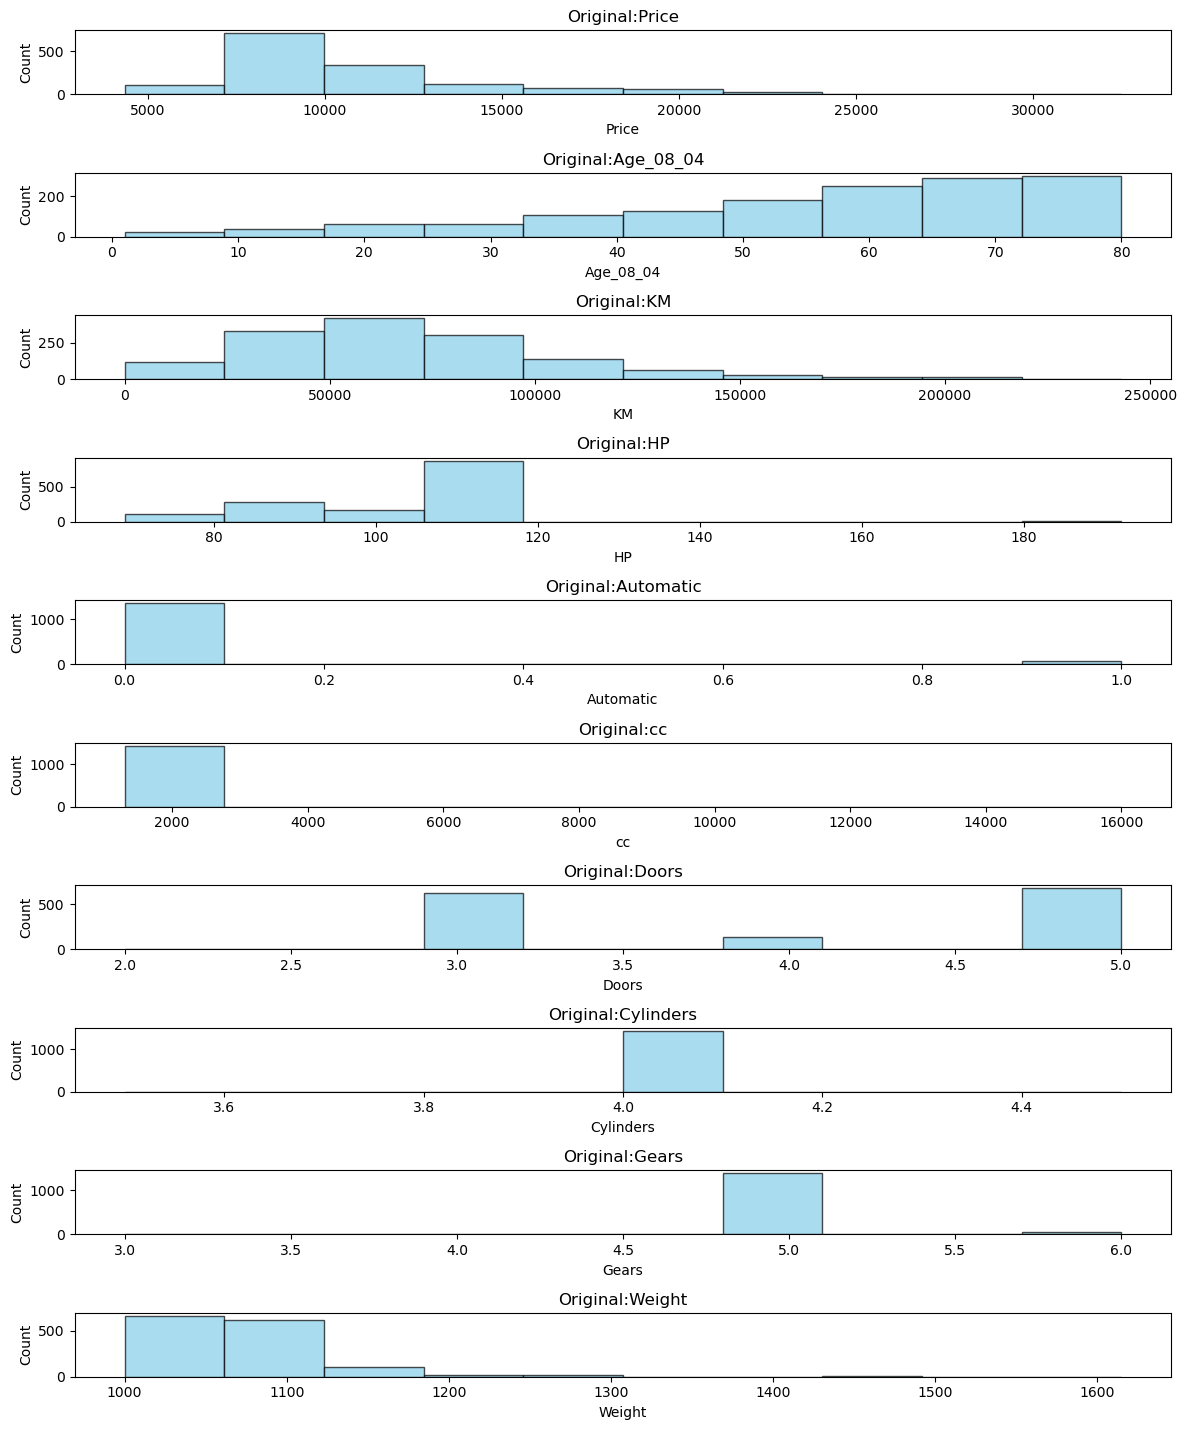

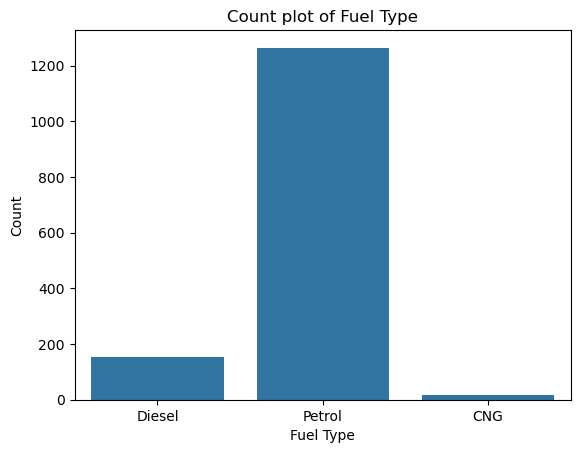

Model 1
Coefficiants: [-1.21516584e+02 -1.95619770e-02  3.07868063e+01  5.15190168e+02
 -1.40041518e-01 -2.20229604e+01 -3.41060513e-13  4.37831883e+02
  2.00697527e+01]
Intercept: -7696.015639300433
Mean Squared error: 1926044.828500128
R-squared: 0.8394579184382995
Model 2
Mean Squared Error: 1934478.8193824275
R-squared: 0.8387549179514566
Model 2 Coefficiants: [-1.20619071e+02 -2.00736433e-02  3.14785892e+01  1.98479994e+01]
Model 2 Intercept: -5626.02012652448
Model 3
Mean Squared Error: 1902836.1294275352
R-squared: 0.8413924387590724
Model 3 Coefficiants: [-1.20499988e+02 -2.00906657e-02  3.05120615e+01 -1.18979298e-01
  0.00000000e+00  4.10638855e+02  2.02162803e+01]
Model 3 Intercept: -7803.837894150794
Lasso & Ridge Regression
Lasso Mean squared error: 1926147.5786779397
Lasso R-squared: 0.8394493538778165
Ridge Mean squared error: 1926082.1857936482
Ridge R_Squared: 0.8394548045867554


In [3]:
def MLR():
    try:

        print("Step1: Load the data and understand the data structure")
        #Read the dataset with the help of data frame lib
        df_Toyotacorolla = pd.read_csv("ToyotaCorolla - MLR.csv")

        print("Step2: Check the data types and column details")
        #Analyzing the dataset
        df_Toyotacorolla.info()

        print("Original Data")
        print(df_Toyotacorolla.describe())
        print(df_Toyotacorolla.head())

        print("Data Cleaning")
        has_nan = df_Toyotacorolla.isna().any().any() # Returns True if any NaN values are present at all in boolean format
        print("Does the data frame have any NAN values?",has_nan)

        count = df_Toyotacorolla.isnull().sum()

        print("Following are the count of missing values according to colums:")
        print(count)

        duplicates=df_Toyotacorolla.duplicated()
        print("Count of duplicate rows:",duplicates.sum())

        #Treat duplicate values and missing values
        df_Toyota_cleaned = df_Toyotacorolla.copy()
        df_Toyota_cleaned = df_Toyota_cleaned.drop_duplicates()

        #Identify numerical columns in the dataset
        numeric_col = df_Toyota_cleaned.select_dtypes(include=['int64','float64']).columns
        categ_col = df_Toyota_cleaned.select_dtypes(include=['object','category']).columns
        numeric_col_str = str(numeric_col)
        categ_col_str = str(categ_col)
       
        print(numeric_col_str)
        print(categ_col_str)

        #Plot the histogram for numerical column to understand the Data
        fig,axes = plt.subplots(len(numeric_col),1,figsize=(12,15))

        for i,col in enumerate(numeric_col):
            axes[i].hist(df_Toyota_cleaned[col],bins=10,color='skyblue',edgecolor='black',alpha=0.7)
            axes[i].set_title(f"Original:{col}")
            axes[i].set_ylabel("Count")
            axes[i].set_xlabel(col)
        
        plt.tight_layout(rect=[0,0,1,0.96])
        plt.show()

        #Plot the count plot for Categorical column to understand the Data
        sns.countplot(x='Fuel_Type',data=df_Toyota_cleaned)
        plt.title('Count plot of Fuel Type')
        plt.xlabel('Fuel Type')
        plt.ylabel('Count')
        plt.show()

        #Encoding categorical variable
        fuel_type_dummies = pd.get_dummies(df_Toyota_cleaned['Fuel_Type'],drop_first=True)
        df_Toyota_cleaned = pd.concat([df_Toyota_cleaned.drop('Fuel_Type',axis=1),fuel_type_dummies],axis=1)

        #Feature and target variable selection
        X = df_Toyota_cleaned[['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors','Cylinders', 'Gears', 'Weight']]
        y = df_Toyota_cleaned['Price']

        # 2. Splitting the dataset
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

        # 3. Building and interpreting multiple linear regression models

        # Model 1: Simple Linear regression model
        print("Model 1")
        model1 = LinearRegression()
        model1.fit(X_train,y_train)

        #Coefficients and intercept
        print("Coefficiants:",model1.coef_)
        print("Intercept:",model1.intercept_)

        # 4. Model Evaluation
        predictions = model1.predict(X_test)
        print("Mean Squared error:", mean_squared_error(y_test,predictions))
        print("R-squared:",r2_score(y_test,predictions))

        # Model 2:  Linear Regression with selected features (Age, KM,HP,Weight)
        print("Model 2")
        X_selected = X_train[['Age_08_04','KM','HP','Weight']]
        X_test_selected = X_test[['Age_08_04', 'KM', 'HP', 'Weight']]
        model2 = LinearRegression()
        model2.fit(X_selected,y_train)

        # 4. Model evaluation
        predictions = model2.predict(X_test_selected)
        print("Mean Squared Error:",mean_squared_error(y_test,predictions))
        print("R-squared:",r2_score(y_test,predictions))

        #Coefficients and intercept
        print("Model 2 Coefficiants:",model2.coef_)
        print("Model 2 Intercept:",model2.intercept_)

        # Model 3: Linear Regression without 'Doors' and 'Automatic'
        print("Model 3")
        X_train_mod = X_train.drop(['Doors','Automatic'],axis=1)
        X_test_mod = X_test.drop(['Doors','Automatic'],axis=1)
        model3 = LinearRegression()
        model3.fit(X_train_mod,y_train)

        # 4. Model evaluation
        predictions = model3.predict(X_test_mod)
        print("Mean Squared Error:", mean_squared_error(y_test,predictions))
        print("R-squared:",r2_score(y_test,predictions))

        #Coefficients and intercept
        print("Model 3 Coefficiants:",model3.coef_)
        print("Model 3 Intercept:",model3.intercept_)

        # 5. Applying Lasso and ridge regression
        print("Lasso & Ridge Regression")
        lasso = Lasso(alpha=0.1)
        lasso.fit(X_train,y_train)
        lasso_prediction = lasso.predict(X_test)
        print("Lasso Mean squared error:",mean_squared_error(y_test,lasso_prediction))
        print("Lasso R-squared:",r2_score(y_test,lasso_prediction))

        ridge = Ridge(alpha=0.1)
        ridge.fit(X_train,y_train)
        ridge_predictions = ridge.predict(X_test)
        print("Ridge Mean squared error:",mean_squared_error(y_test,ridge_predictions))
        print("Ridge R_Squared:",r2_score(y_test,ridge_predictions))

    except FileNotFoundError:
        print("Error")


MLR()